<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1500/2887394494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


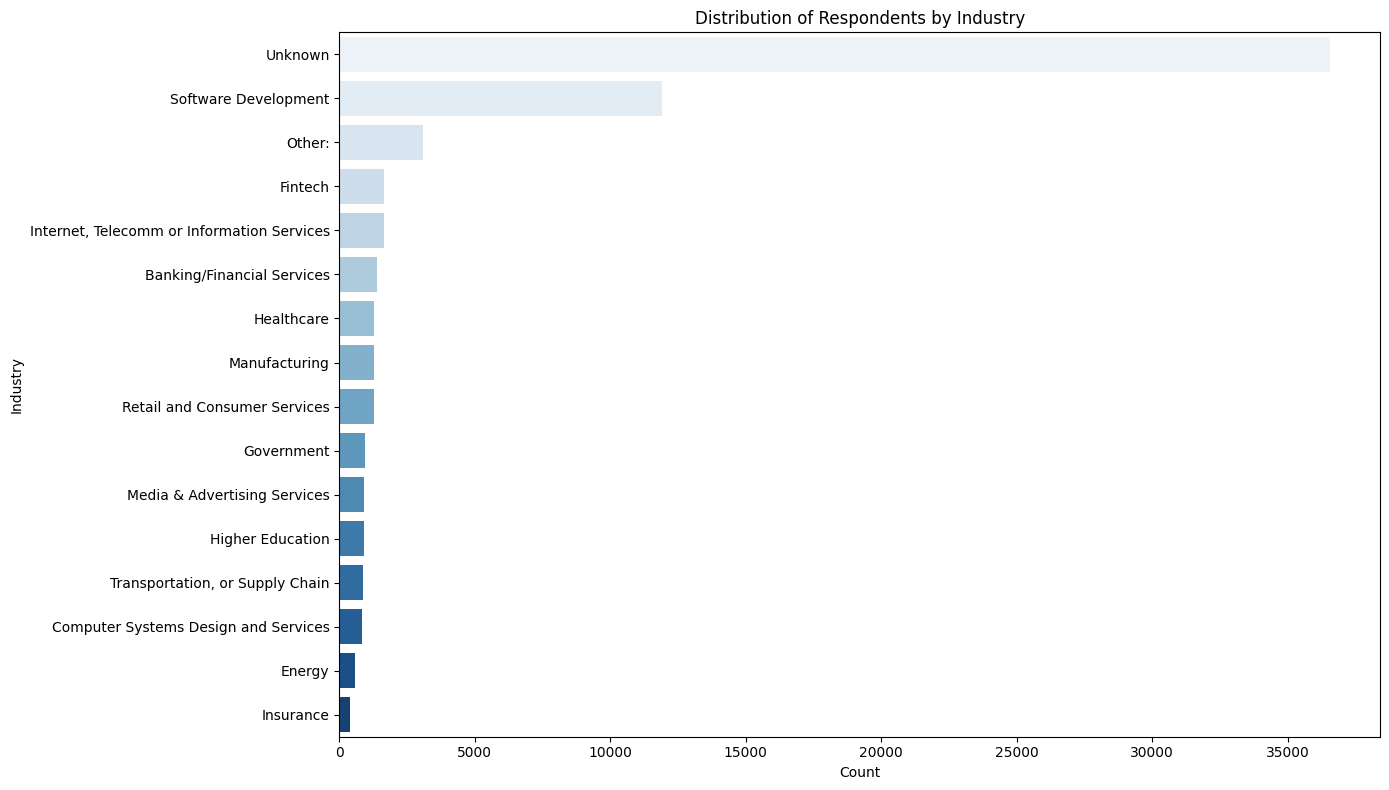

In [11]:
##Write your code here
df['Industry'] = df['Industry'].fillna('Unknown')
plt.figure(figsize=(14,8))

sns.countplot(
    data=df,
    y='Industry',
    order=df['Industry'].value_counts().index,
    palette='Blues'
)

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

## This indicates that the majority of the entries had an unknown Industry

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [15]:
##Write your code here
print("Mean:", df['ConvertedCompYearly'].mean())
print("Median:", df['ConvertedCompYearly'].median())
print("Standard Deviation:", df['ConvertedCompYearly'].std())

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Interquartile range (IQR): 75259.5
Upper bound: 220860.75
Lower bound: -80177.25
Number of outliers: 978


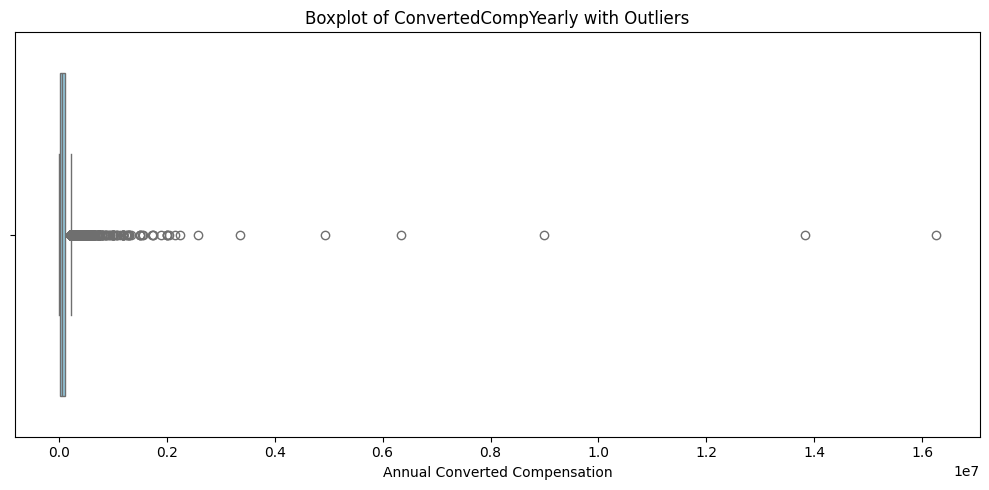

In [19]:
##Write your code here
import numpy as np

col = df['ConvertedCompYearly']

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Interquartile range (IQR):", IQR)
print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)

outliers = col[(col < lower_bound) | (col > upper_bound)]
print("Number of outliers:", outliers.count())

plt.figure(figsize=(10,5))
sns.boxplot(x=col, color='skyblue')
plt.title('Boxplot of ConvertedCompYearly with Outliers')
plt.xlabel('Annual Converted Compensation')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [23]:
##Write your code here
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) &
(df['ConvertedCompYearly'] <= upper_bound)]

print("Original size:", df.shape)
print("New Size:", df_no_outliers.shape)
print("Rows removed:", df.shape[0] - df_no_outliers.shape[0])

Original size: (65437, 114)
New Size: (22457, 114)
Rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


 Age_Numeric            1.000000
WorkExp                0.850655
ConvertedCompYearly    0.121512
JobSat                 0.069844
CompTotal             -0.002761
JobSatPoints_1        -0.027908
ResponseId            -0.037967
JobSatPoints_8        -0.046092
JobSatPoints_6        -0.050228
JobSatPoints_4        -0.076032
JobSatPoints_9        -0.081633
JobSatPoints_7        -0.082683
JobSatPoints_5        -0.101475
JobSatPoints_11       -0.107092
JobSatPoints_10       -0.114350
Name: Age_Numeric, dtype: float64


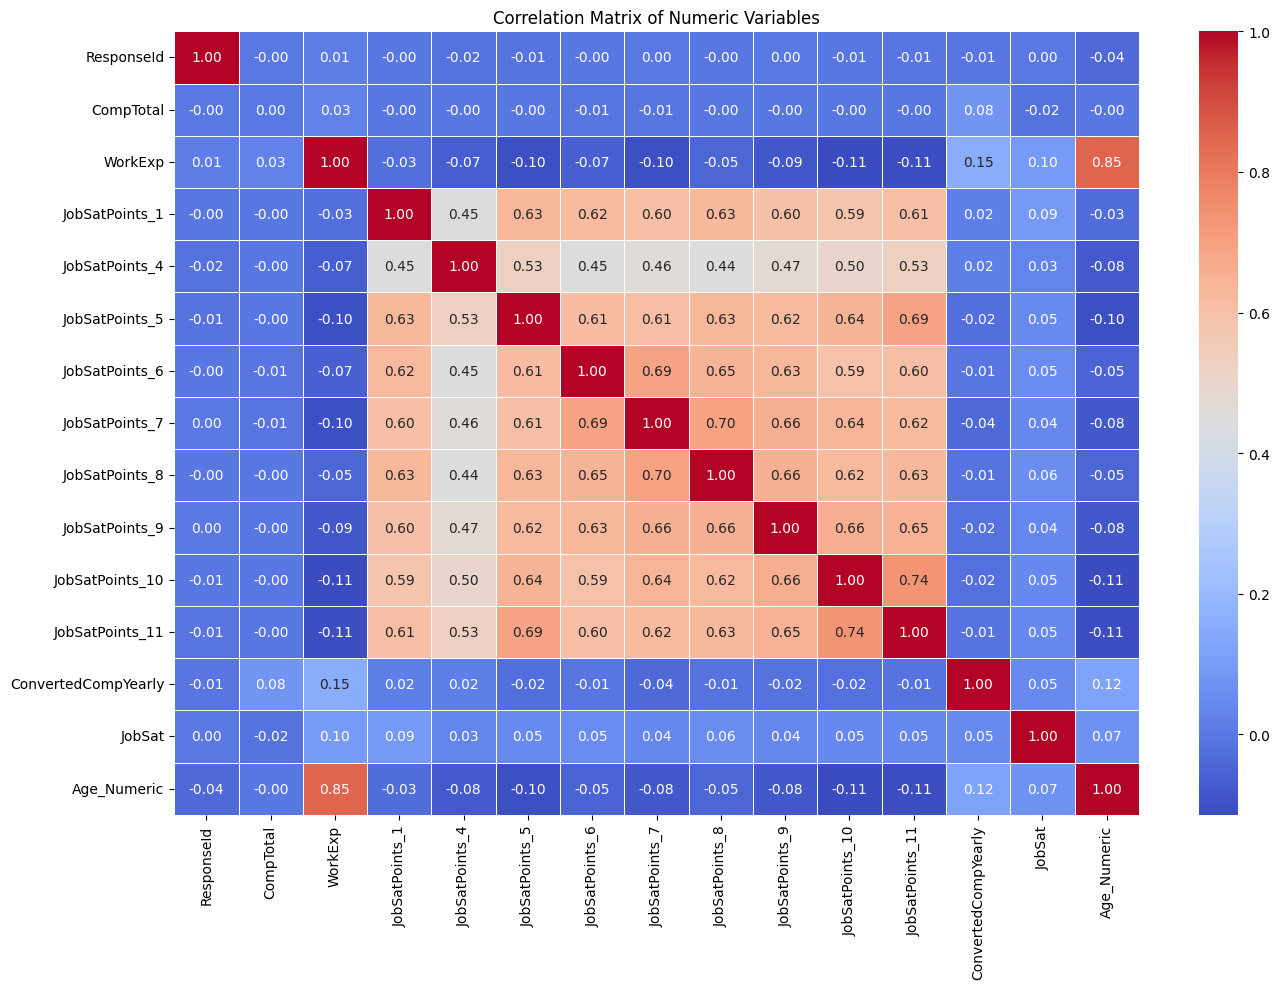

In [38]:
##Write your code here
print(df['Age'].value_counts())
## 'Age' is already mapped to approximate numeric values, but we need to make it numeric for computing correlations and visualizing the correlation matrix

age_map_numeric = {
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Under 18 years old': 16,
    'Prefer not to say': None
}
df['Age_Numeric'] = df['Age'].map(age_map_numeric)

 ## Correlation between Age and other numeric variables
corr_with_age = df.corr(numeric_only=True)['Age_Numeric'].sort_values(ascending=False)
print("\n\n", corr_with_age)

## Correlation Matrix 
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
